# Exercise 7 Solution

The csv file "classdata/BA_news_return.csv" contains the headlines of the news about The Boeing Company published by Thomson Reuters each day in 2020. See column **headline**. It also contains the stock return of Boeing one day after the news being published. See column **nextday_RET**. Note that there can be multiple news on Boeing published on the same day.  If so, the **headline** field will contain the headlines of all news on that day. (They are concatenated into one string.). Your task is to identify the main topics in each day's healines using a LDA model. 

The following code reads the data into **df**.

In [16]:
import pandas as pd
df = pd.read_csv("classdata/BA_news_return.csv")
df["headline"]=df["headline"].str.replace("737 MAX", "737MAX")
df.head()

,date,nextday_RET,headline
0,2020-01-02,-0.001680,Major commercial plane crash deaths worldwide ...
1,2020-01-03,0.002945,RYANAIR CEO O'LEARY TELLS GERMANY'S WIRTSCHAFT...
2,2020-01-06,0.010607,MEDIA-U.S. regulators mull ordering extra simu...
3,2020-01-07,-0.017523,BOEING SUPPLIER SPIRIT AEROSYSTEMS OFFERS SOME...
4,2020-01-08,0.014998,"UPDATE 3-Boeing changes stance, recommends 737..."


1. Create a DTM for column "headline" based on the following requirements:

    - Use the default tokenizer from sklearn library. 
    - Add "boeing" and "says" to the stop word list of nltk and then remove stop words. 
    - Stem the tokens using the SnowBall stemmer from nltk. 
    - Create DTM with TF score and unigram.

Print the shape of your DTM. 

In [17]:
#You answer here:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

nltk_stopwords = nltk.corpus.stopwords.words("english") 
nltk_stopwords=nltk_stopwords + ['boeing','says']
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords)

DTM =vectorizer.fit_transform(df['headline']) 

#Check your answer
DTM.shape

(247, 4568)

2.a Plot the perplexity score against the number of topics of a LDA model built on the DTM from question 1. You need to plot the numbers of topics from 6 to 15. Set the parameters of your LDA model as follows:

 - n_jobs=-1
 - max_iter=50
 - random_state=2021

6
7
8
9
10
11
12
13
14
15


Text(0, 0.5, 'Perplexity')

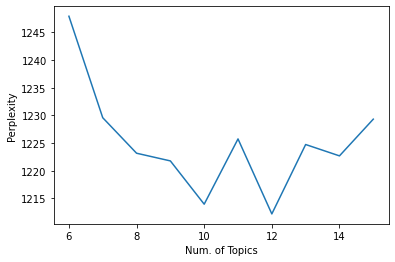

In [18]:
#You answer here:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=50,   
                                random_state=2021 
                               )

num_topics=list(range(6,16))
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))


plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

2.b According to the plot in question 2.a, use the Elbow method to determine the number of topics of the LDA model. Build the LDA model using the DTM from question 1. Set the parameters of your LDA vectorizer as follows:

 - n_jobs=-1
 - max_iter=50
 - random_state=2021
 
Save your LDA model as a variable called **lda** and print the perplexity score.

In [19]:
#You answer here:

lda = LatentDirichletAllocation(n_components=12,
                                n_jobs=-1,   
                                max_iter=50,   
                                random_state=2021 
                               )
lda.fit(DTM)

#Check your answer
lda.perplexity(DTM)

1212.1889292289327

3. Create the term-topic matrix for the LDA model you created in question 2.b. Save term-topic matrix as a data frame called **TTopicM**. 

In [20]:
#You answer here:
from sklearn import preprocessing
import numpy as np
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
#Check your answer
TTopicM.head()

/home/abromeland/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11
000,0.001209,0.000433,0.001203,0.00001,0.000939,0.000679,0.000895,0.002991,0.000014,0.000009,0.004589,0.000786
000415,0.000027,0.000033,0.000016,0.00001,0.000017,0.000011,0.000008,0.000036,0.000014,0.000009,0.000036,0.000354
01,0.000027,0.000033,0.000016,0.00001,0.000017,0.000011,0.000100,0.000036,0.000014,0.000009,0.000036,0.000027
030000,0.000027,0.000033,0.000206,0.00001,0.000017,0.000011,0.000008,0.000036,0.000014,0.000009,0.000036,0.000027
040,0.000027,0.000033,0.000016,0.00001,0.000017,0.000011,0.000008,0.000036,0.000185,0.000009,0.000036,0.000027


4. Based on the term-topic matrix in question 3, identify the ten most likely words under each topic and save them as columns in a data frame called **TermOfTopic**. 

In [21]:
#You answer here:
TermOfTopic =pd.DataFrame([])
for i in range(12):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic 
#Check your answer
TermOfTopic

,0,1,2,3,4,5,6,7,8,9,10,11
0,737max,air,updat,737max,order,updat,ceo,eu,ryanair,iran,safran,737max
1,faa,ceo,737max,reuter,aircraft,spirit,737max,tariff,ceo,crash,product,updat
2,share,737max,air,insid,airway,airlin,co,subsidi,updat,airlin,ceo,ana
3,order,fitch,airlin,updat,deliveri,embraer,expect,trade,airlin,ukrain,updat,aircraft
4,southwest,ba,aircraft,flight,updat,rate,2020,disput,order,ukrainian,737max,aviat
5,ba,airbus,share,max,qatar,coronavirus,product,wto,max,reuter,airbus,agreement
6,updat,leas,product,order,cancel,share,aircraft,exclus,aircraft,plane,pa,share
7,certif,aircraft,airbus,test,ceo,product,bln,sale,new,insid,share,order
8,report,order,order,share,cathay,moodi,airlin,arm,leari,updat,restart,sale
9,refinitiv,jet,buzz,year,pacif,aerosystem,updat,taiwan,year,canada,airlin,brief


5. Create the document-topic matrix and save it as a data frame called **DTopicM**. Create a new data frame called **dfnew** by concatinating **df** and **DTopicM** horizontally (i.e., axis=1). 

In [22]:
#Your answer here:
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df, DTopicM], axis=1)

#Chek your answer
dfnew.head()

,date,nextday_RET,headline,0,1,2,3,4,5,6,7,8,9,10,11
0,2020-01-02,-0.001680,Major commercial plane crash deaths worldwide ...,0.000275,0.000275,0.000275,0.996975,0.000275,0.000275,0.000275,0.000275,0.000275,0.000275,0.000275,0.000275
1,2020-01-03,0.002945,RYANAIR CEO O'LEARY TELLS GERMANY'S WIRTSCHAFT...,0.000772,0.000772,0.000772,0.848574,0.000772,0.000772,0.000772,0.000772,0.143709,0.000772,0.000772,0.000772
2,2020-01-06,0.010607,MEDIA-U.S. regulators mull ordering extra simu...,0.000318,0.000318,0.000318,0.996501,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318
3,2020-01-07,-0.017523,BOEING SUPPLIER SPIRIT AEROSYSTEMS OFFERS SOME...,0.000178,0.000178,0.000178,0.000178,0.000178,0.998037,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178
4,2020-01-08,0.014998,"UPDATE 3-Boeing changes stance, recommends 737...",0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.999381,0.000056,0.000056


6. Run the following code the generate the correlation between the stock returns and the topic scores. Which topic is most negatively correlated with the stock return of Boeing. Use a few words to describe this topic. Similary, which topic is most positively correlated with the stock return. Use a few words to describe this topic.

**Your answer here:**

The most negative topic: southwest, faa

The most positive topic: Spirit AeroSystems, embraer

In [23]:
#This code calculates the correlation between any two numeric columns in the data frame
dfnew.corr()

,nextday_RET,0,1,2,3,4,5,6,7,8,9,10,11
nextday_RET,1.000000,-0.167804,-0.032944,-0.054646,0.034392,-0.010306,0.166192,0.004212,-0.004230,0.057498,0.049533,-0.018131,-0.077568
0,-0.167804,1.000000,-0.080931,-0.065274,-0.145108,-0.134799,-0.137864,-0.126658,-0.039648,-0.086143,-0.056137,-0.064229,-0.085114
1,-0.032944,-0.080931,1.000000,-0.059529,-0.113779,-0.074905,-0.085051,-0.107167,-0.070560,-0.077230,-0.067015,-0.055582,-0.046773
2,-0.054646,-0.065274,-0.059529,1.000000,-0.153497,-0.106125,-0.124609,-0.122840,-0.046556,-0.119721,-0.112012,-0.063876,-0.098057
3,0.034392,-0.145108,-0.113779,-0.153497,1.000000,-0.121446,-0.190287,-0.103595,-0.075439,-0.098661,0.013108,-0.047523,-0.132126
4,-0.010306,-0.134799,-0.074905,-0.106125,-0.121446,1.000000,-0.090623,-0.067017,-0.009792,-0.125202,-0.082841,-0.078226,-0.102500
5,0.166192,-0.137864,-0.085051,-0.124609,-0.190287,-0.090623,1.000000,-0.096245,-0.107391,-0.160052,-0.153950,-0.085450,-0.092710
6,0.004212,-0.126658,-0.107167,-0.122840,-0.103595,-0.067017,-0.096245,1.000000,-0.090789,-0.080884,-0.060508,-0.088372,-0.075494
7,-0.004230,-0.039648,-0.070560,-0.046556,-0.075439,-0.009792,-0.107391,-0.090789,1.000000,-0.065082,-0.061376,-0.071744,-0.060678
8,0.057498,-0.086143,-0.077230,-0.119721,-0.098661,-0.125202,-0.160052,-0.080884,-0.065082,1.000000,-0.102265,-0.047423,-0.067834
